# Imports, classes and methods declaration

In [1]:
from google.colab import drive
import sys
import os
import numpy as np

# Local python files imports
drive.flush_and_unmount()
drive.mount("/content/gdrive", force_remount=True)
sys.path.append(os.path.abspath(
    '/content/gdrive/MyDrive/ULPGC/TFT/projects/X-Ray_Model')
)
from x_ray_model.model.model import Model
from x_ray_model.dataset import Dataset
from x_ray_model.common.constants import DATASET_1_1
from x_ray_model.model.utils.plotters import (
    plot_results,
    get_falses,
    plot_images
)
from x_ray_model.model.utils.data_management import (
    dataset_images_to_files,
    load_data
)

Mounted at /content/gdrive


# Dataset selector



In [2]:
dataset = Dataset(DATASET_1_1)
dataset_images_to_files(dataset)

INFO [10/10/21 20:01:55] => Getting images from Non-COVID-19
INFO [10/10/21 20:02:11] => Getting images from COVID-19
INFO [10/10/21 20:02:28] => Splitting dataset into training and test
INFO [10/10/21 20:02:28] => The dataset has been generated successfully
*************************************************
INFO [10/10/21 20:02:28] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_1/train_images
INFO [10/10/21 20:02:31] => The data has been inserted successfully
*************************************************
INFO [10/10/21 20:02:31] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_1/train_labels
INFO [10/10/21 20:02:31] => The data has been inserted successfully
*************************************************
INFO [10/10/21 20:02:31] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_1/test_images
INFO [10/10/21 20:02:31] => The data

In [3]:
load_data(dataset)

INFO [10/10/21 20:02:31] => Retrieving all the dataset from files
INFO [10/10/21 20:02:33] => All the dataset has been obtained successfully


# Model build

In [4]:
model = Model(dataset)

*************************************************
INFO [10/10/21 20:02:34] => Training model
Epoch 1/60
22/22 [==============================] - 41s 409ms/step - loss: 0.6501 - accuracy: 0.6417 - val_loss: 0.6855 - val_accuracy: 0.5620
Epoch 2/60
22/22 [==============================] - 7s 300ms/step - loss: 0.4235 - accuracy: 0.7971 - val_loss: 0.6136 - val_accuracy: 0.7190
Epoch 3/60
22/22 [==============================] - 7s 301ms/step - loss: 0.3269 - accuracy: 0.8748 - val_loss: 0.3097 - val_accuracy: 0.8540
Epoch 4/60
22/22 [==============================] - 7s 300ms/step - loss: 0.2027 - accuracy: 0.9314 - val_loss: 0.2055 - val_accuracy: 0.9234
Epoch 5/60
22/22 [==============================] - 7s 301ms/step - loss: 0.1614 - accuracy: 0.9470 - val_loss: 0.1636 - val_accuracy: 0.9380
Epoch 6/60
22/22 [==============================] - 7s 301ms/step - loss: 0.0948 - accuracy: 0.9735 - val_loss: 0.2611 - val_accuracy: 0.9051
Epoch 7/60
22/22 [==============================] - 7s

# Train results

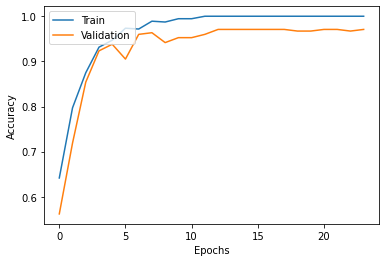

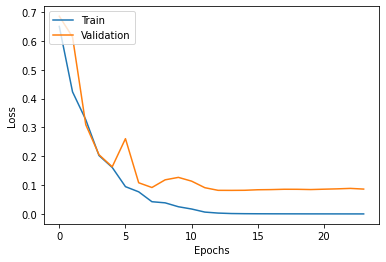

No handles with labels found to put in legend.


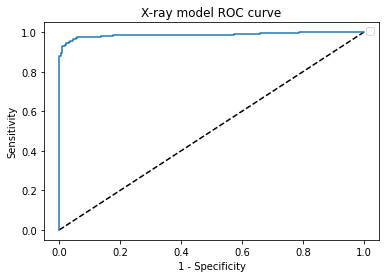

INFO [10/10/21 20:05:52] => Classification report:
              precision    recall  f1-score   support

   Not COVID       0.92      0.99      0.96       220
       COVID       0.99      0.92      0.96       236

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456



NameError: ignored

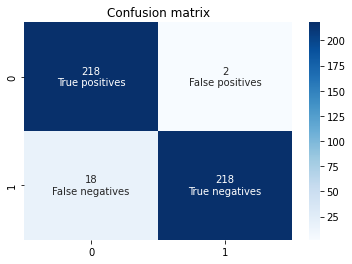

In [5]:
plot_results(dataset.test_images, dataset.test_labels, model.results)

# Visualize falses

In [6]:
false_negatives, false_positives = get_falses(
  dataset.test_images, 
  dataset.test_labels, 
  np.round(model.results['Model test predictions'])
)

INFO [10/10/21 20:07:44] => Getting false negatives and positives...
INFO [10/10/21 20:07:44] => Falses report:
- False negatives: 18
- False positives: 2


INFO [10/10/21 20:07:46] => Plotting false negatives


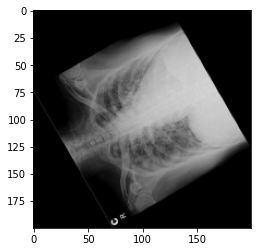

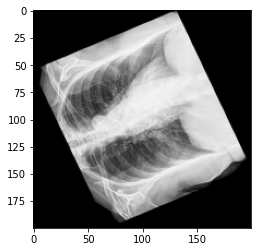

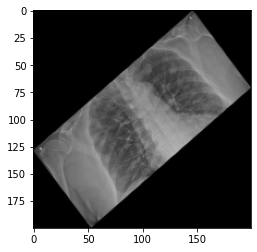

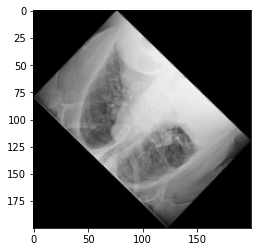

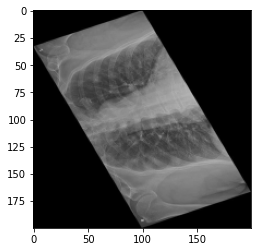

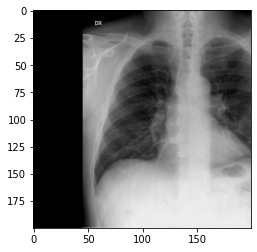

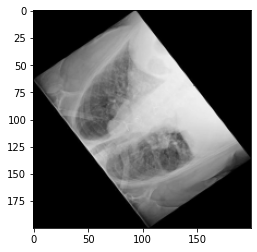

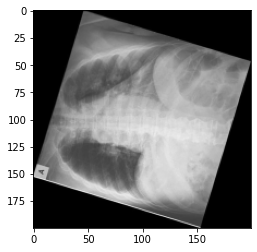

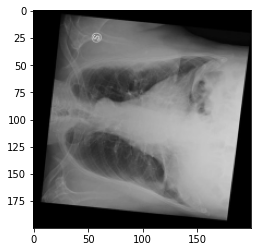

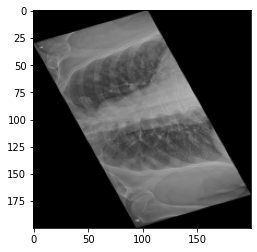

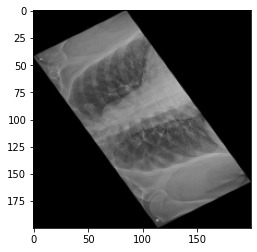

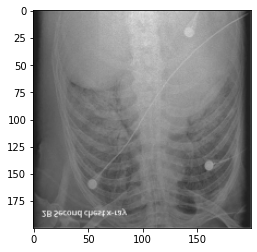

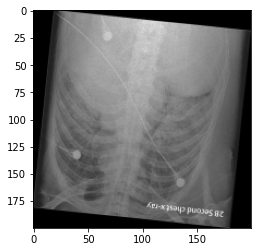

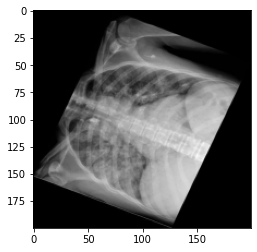

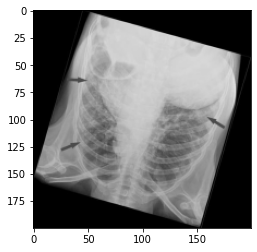

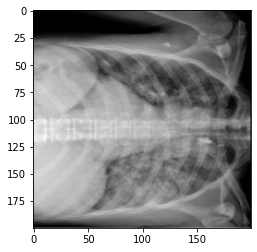

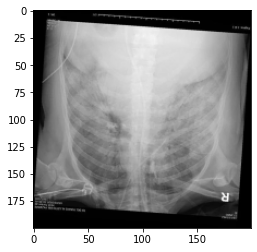

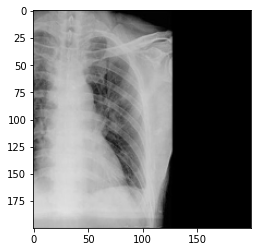

In [7]:
plot_images(false_negatives, 'false negatives')

INFO [10/10/21 20:07:50] => Plotting false positives


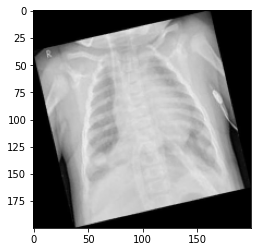

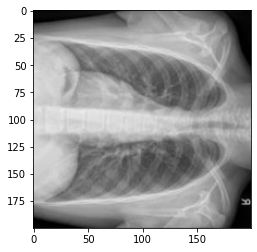

In [8]:
plot_images(false_positives, 'false positives')